# Практическая работа № 2: Исследование однородного линейного уравнения с периодическими коэффициентами

Выполнил студент гр. 9381 Гурин Семен, вариант 3

## Цель работы

Изучение устойчивости однородного линейного уравнения с периодическими коэффициентами при $t \to + \infty$.

## Основные теоретические положения

Системой однородных линейных дифференциальных уравнений с периодическими коэффициентами называется система однородных линейных ОДУ следующего вида:

$$ X' = A(t) X, \;\; A(t + T) = A(t), \;\; t \ge 0 \;\;\;\;\;\;\;\; (0) $$
$$ X' = (x_1', \dots, x_n')^T, \;\; X = (x_1, \dots, x_n)^T, \;\; A(t) = || a_{ij}(t) ||, \;\; a_{ij}(t + T) = a_{ij}(t)$$

Число $T > 0$ называют периодом коэффициентов системы $(0)$.

Фундаментальной матрицей системы $(0)$ называется такая матрица $\Phi(t)$, что ее стобцы являются линейно независимыми решениями системы $(0)$. В матричном виде: $\Phi' = A(t)\Phi$.

Основной матрицей для фундаментальной матрицы $\Phi(t)$ называется такая матрица $C$, что $\Phi(t + T) = \Phi(t)C, \; \forall t \ge 0$.

Спектральным радиусом матрицы $C$ называется число $r(C) = \max\limits_{i}|\lambda_i|$, где $\lambda_i$ - собственные числа матрицы $C$.

## Постановка задачи

Дано дифференциальное уравнение:

$$ x'' + a(p,t)x = 0, \;\; a(p,t) = p + b(t), \;\; b(t + T) = b(t), $$

где $p$ - параметр.

Данное уравнение сводится к системе двух уравнений I-го порядка:

$$
\begin{cases}
    u'_1 = u_2, \\
    u'_2 = -a(p,t)u_1;
\end{cases}
\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; (1)
$$

Здесь $u_1(t) = x(t), \; u_2(t) = x'(t)$.

Необходимо провести исследование устойчивости однородного линейного уравнения. Дальнейшие рассуждения применимы к любой линейной периодической системе, а не только к системе вида $(1)$.

## Выполнение работы

Функция $b(t)$ задана выражением $b(t)=e^{\cos t}$

In [49]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

In [50]:
def b(t):
    return np.exp(np.cos(t))

def a(p,t):
    return p+b(t)

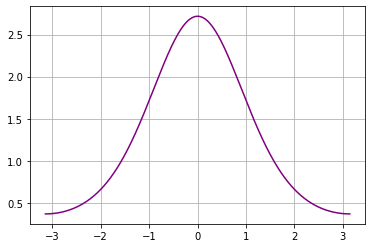

In [51]:
b_ar = [b(t) for t in np.arange(-np.pi, np.pi, 0.001)]

plt.grid(True)
plt.plot(np.arange(-np.pi, np.pi, 0.001), b_ar, color='purple')
plt.show()

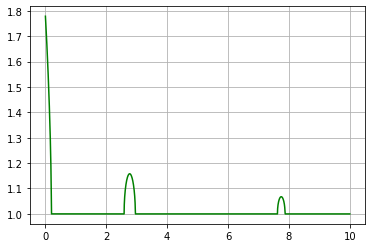

In [52]:
p_arr = np.arange(0, 10, 0.001)

def spectral_radius(p_arr):
    interval = np.array([0, np.pi])
    v1 =  np.array([1, 0])
    v2 = np.array([0, 1])
    result = []

    for p in p_arr:
        f = lambda t, x: [x[1], -a(p, t) * x[0]]
        u1 = solve_ivp(f, interval, v1)
        u2 = solve_ivp(f, interval, v2)
        c = np.array([[u1.y[0][-1], u2.y[0][-1]], [u1.y[1][-1], u2.y[1][-1]]])
        tmp_res = max(abs(np.linalg.eigvals(c)))
        result.append(tmp_res)
    return result

s_radius = spectral_radius(p_arr)
plt.plot(p_arr, s_radius, color='green')
plt.grid(True)

In [53]:
def stability(s_radius, p_arr):
    for i in range(len(s_radius)):
        if s_radius[-1-i] > 1:
            p0 = p_arr[-i]
            break
    return p0

p0 = stability(s_radius, p_arr)
print('p0 = ',p0)

p0 =  7.873


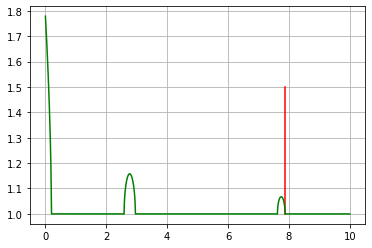

In [54]:
plt.plot([p0, p0], [1, 1.5],color = 'red')
plt.plot(p_arr, s_radius, color='green')
plt.grid(True)

p0 is correct


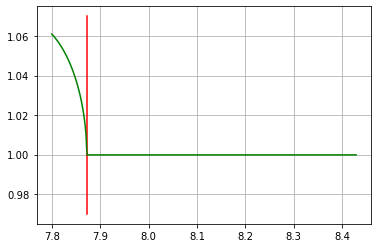

In [55]:
plt.plot([p0, p0], [0.97, 1.07], color="red")
plt.plot(p_arr[-int(2.2 / 0.001):-int(1.57 / 0.001)], s_radius[-int(2.2 /  0.001):-int(1.57 / 0.001)], color ='green')
plt.grid(True)
print('p0 is correct')

## Вывод

В ходе выолнения практической работы были получены навыки проверки устойчивости однородного линейного уравнения с периодическими коэффициентами при $t \to + \infty$. Была найдена граница устойчивости и неустойчивости уравнения $b(t)=e^{\cos t}$, она равна $ 7.873 $